In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
invertebrate_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')
invertebrate_data.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [50]:
invertebrate_data.shape

(280, 6)

In [51]:
invertebrate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [52]:
invertebrate_data['management'].value_counts()

7    38
5    35
1    34
4    32
6    31
2    31
3    28
8    26
0    25
Name: management, dtype: int64

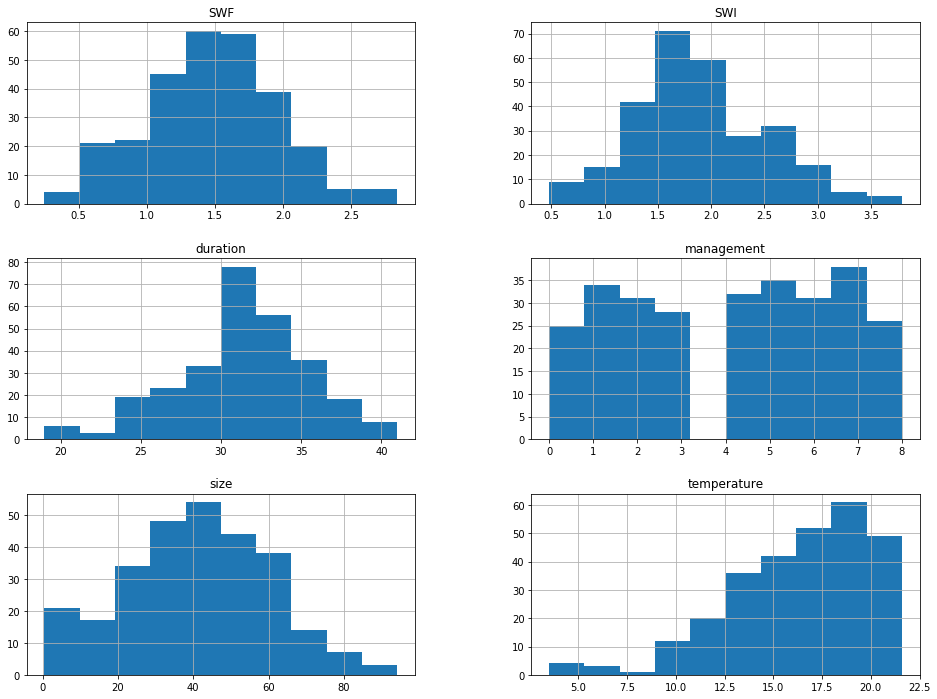

In [53]:
invertebrate_data.hist(bins=10,figsize = (16,12))
plt.show()

In [54]:
columns = list(invertebrate_data.columns).remove('management')
invertebrate_data.pivot_table(columns,['management'],aggfunc = np.median)

,SWF,SWI,duration,size,temperature
management,,,,,
0,1.630,1.700,31.0,36.20,15.60
1,1.315,1.625,32.0,46.10,17.15
2,1.390,1.560,32.0,42.90,18.70
3,1.405,1.780,32.0,42.45,16.85
4,1.500,1.900,31.0,33.90,16.05
5,1.400,1.890,31.0,44.70,16.90
6,1.530,1.850,33.0,38.90,16.80
7,1.560,1.975,32.0,44.10,17.20
8,1.795,2.185,31.5,37.75,17.10


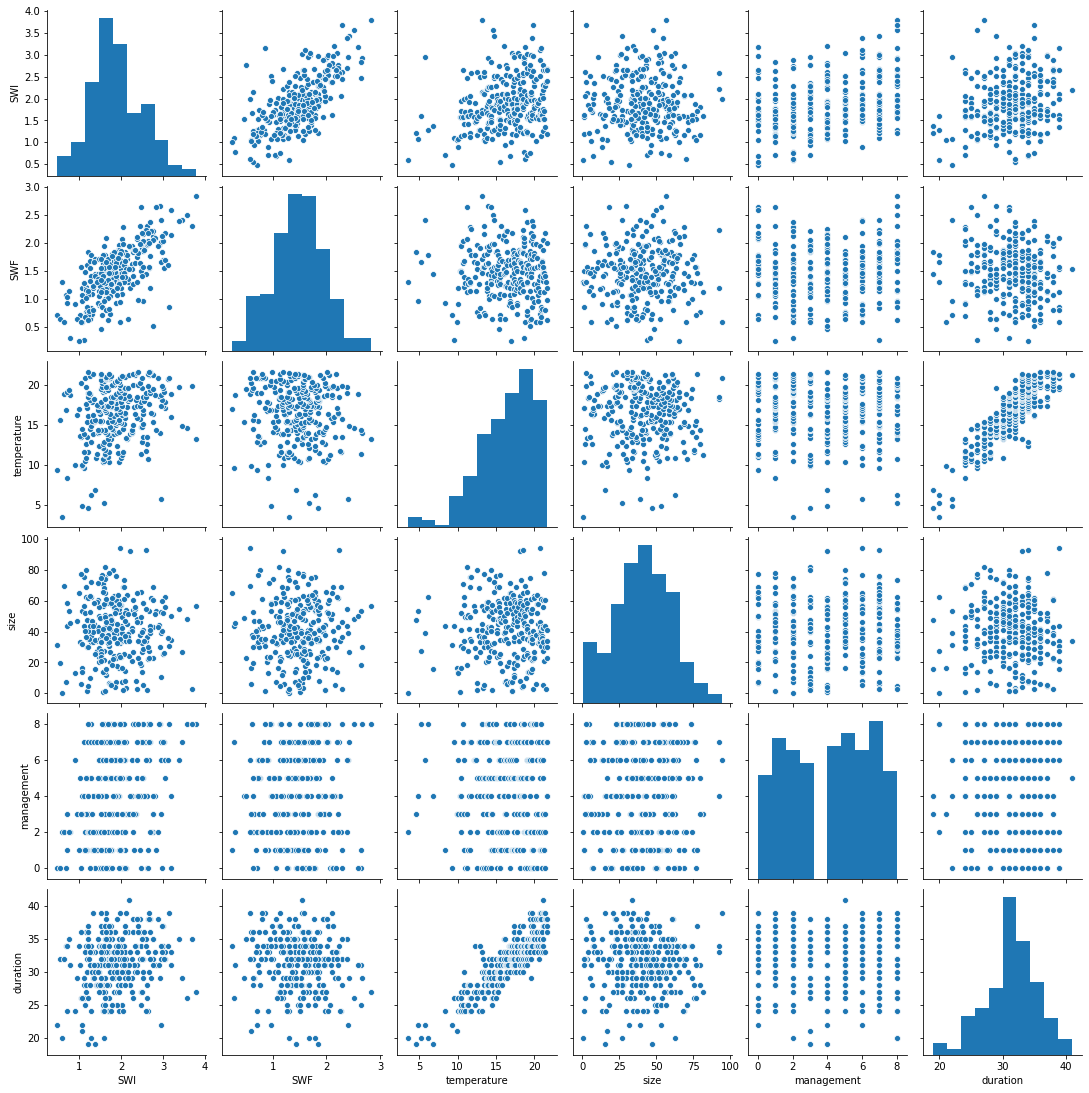

In [55]:
sns.pairplot(invertebrate_data)

In [58]:
invertebrate_data.columns

Index(['SWI', 'SWF', 'temperature', 'size', 'management', 'duration'], dtype='object')

In [61]:
from sklearn.model_selection import train_test_split
X = invertebrate_data.drop(['SWI'],axis = 1)
y = invertebrate_data['SWI']


In [62]:
print(X.shape)
print(y.shape)

(280, 5)
(280,)


In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 32)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.2685253478383064

In [72]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.1172254652695221


In [73]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error:  0.3423820457756541


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6352293940466014

In [75]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')
test_new.head()

,SWF,temperature,size,management,duration
0,0.86,21.6,21.6,5,32
1,1.30,21.6,23.7,4,35
2,1.79,21.7,32.9,3,39
3,1.92,21.8,47.5,7,34
4,0.90,21.8,42.8,6,35


In [77]:
value = model.predict(test_new)

In [78]:
value

array([1.64771198, 1.99902512, 2.4068332 , 2.69961804, 1.77850499,
       3.18797752, 2.42679548, 2.3187899 , 1.97527701, 1.99073479,
       2.46767552, 2.23106075, 1.89808208, 2.97175525, 1.75498109,
       2.10596077, 2.38472711, 1.95495897, 1.936969  , 2.01880009,
       2.81216655, 1.78012454, 2.59528896, 2.30845687, 2.89635675,
       2.38282764, 1.77123346, 2.02643501, 3.1201384 , 1.66114581,
       2.3146838 , 2.07873076, 2.92689792, 2.8037079 , 1.82029774,
       2.86454237, 2.88590715, 2.46658804, 1.77433718, 1.82275749,
       1.60255866, 2.61965368, 2.896064  , 2.86702442, 2.2594417 ,
       2.77006686, 1.71390952, 2.13796633, 2.75555793, 3.04548271,
       1.82200781, 2.77890146, 2.73004475, 2.54704522, 2.27848416,
       1.80939871, 2.39108957, 1.40714825, 1.95712687, 2.67305732,
       2.61394557, 2.72648382, 2.09652267, 2.62505868, 2.21332025,
       2.29243517, 2.32943711, 1.5261486 , 1.91091634, 2.93855376,
       3.54860137, 1.19615323, 2.68334188, 2.38026451, 3.10520

In [79]:
res = pd.DataFrame(value)
res.index = test_new.index
res.columns = ['SWI']
res.to_csv('invertebrae_results.csv')